In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset
df = pd.read_csv("/content/Mall_Customers.csv")

# Display the first few rows
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# Renaming the column
df.rename(columns={"Genre": "Gender"}, inplace=True)

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Gender' to numeric
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])  # Male: 1, Female: 0

# Select relevant features for PCA & t-SNE
X = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

print(X.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40


In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [10]:
# Convert into DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

<ipython-input-11-b6286491b7b0>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.7, cmap="viridis")


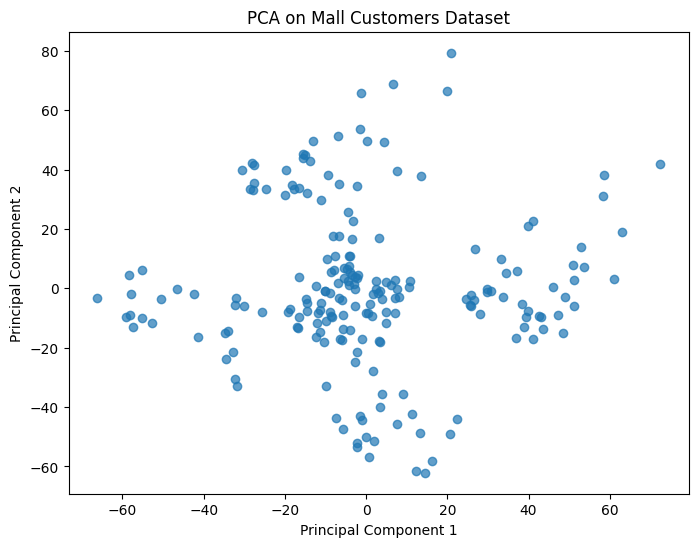

In [11]:
# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.7, cmap="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Mall Customers Dataset")
plt.show()

In [12]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)



In [13]:
# Convert into DataFrame
df_tsne = pd.DataFrame(X_tsne, columns=["Dim1", "Dim2"])




<ipython-input-15-000a0f17b133>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_tsne["Dim1"], df_tsne["Dim2"], alpha=0.7, cmap="coolwarm")


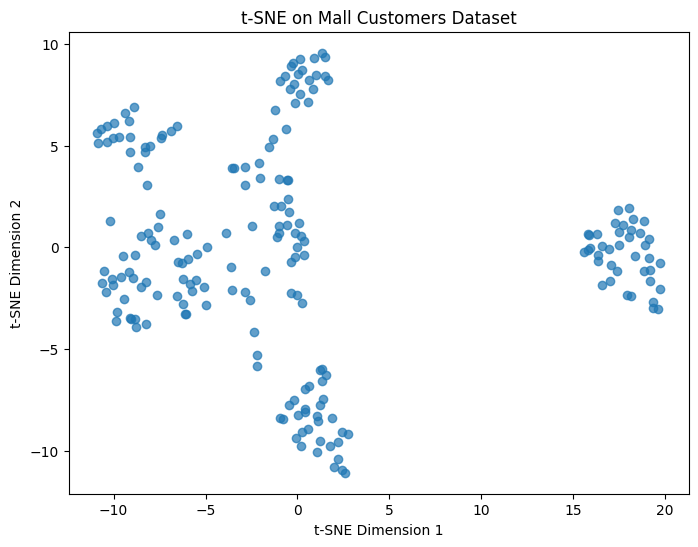

In [15]:
# Visualize t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne["Dim1"], df_tsne["Dim2"], alpha=0.7, cmap="coolwarm")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE on Mall Customers Dataset")
plt.show()